In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [9]:
# Splitting the dataset
X = df.iloc[:,0:8]
Y = df.iloc[:,8]
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.33, random_state=42)

In [10]:
# fit model on training data
model = XGBClassifier()
eval_set = [(X_test, y_test)]
model.fit(X_train, y_train, 
          early_stopping_rounds=10, 
          eval_metric='logloss', 
          eval_set=eval_set, 
          verbose=True)

[0]	validation_0-logloss:0.60697
[1]	validation_0-logloss:0.56261
[2]	validation_0-logloss:0.53835
[3]	validation_0-logloss:0.52276
[4]	validation_0-logloss:0.51074
[5]	validation_0-logloss:0.50890
[6]	validation_0-logloss:0.50851
[7]	validation_0-logloss:0.51019
[8]	validation_0-logloss:0.51279
[9]	validation_0-logloss:0.52036
[10]	validation_0-logloss:0.52229
[11]	validation_0-logloss:0.52651
[12]	validation_0-logloss:0.52992
[13]	validation_0-logloss:0.53040
[14]	validation_0-logloss:0.54070
[15]	validation_0-logloss:0.54597
[16]	validation_0-logloss:0.54907


C:\Users\roija\Anaconda\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\roija\Anaconda\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [11]:
# make predictions for test data
predictions = model.predict(X_test)

In [12]:
# evaluate prediction 
accuracy = accuracy_score(y_test, predictions)
print('Accuracy: %.2f%%' % (accuracy * 100.0))

Accuracy: 73.23%


### Feature Importance using XGBoost

In [13]:
from xgboost import plot_importance
from matplotlib import pyplot

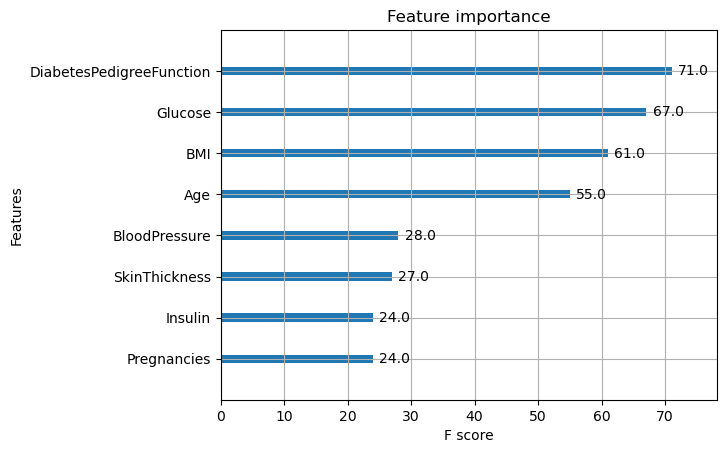

In [14]:
# plot feature improtance
plot_importance(model)
pyplot.show()

### XGBoost trees diagram

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

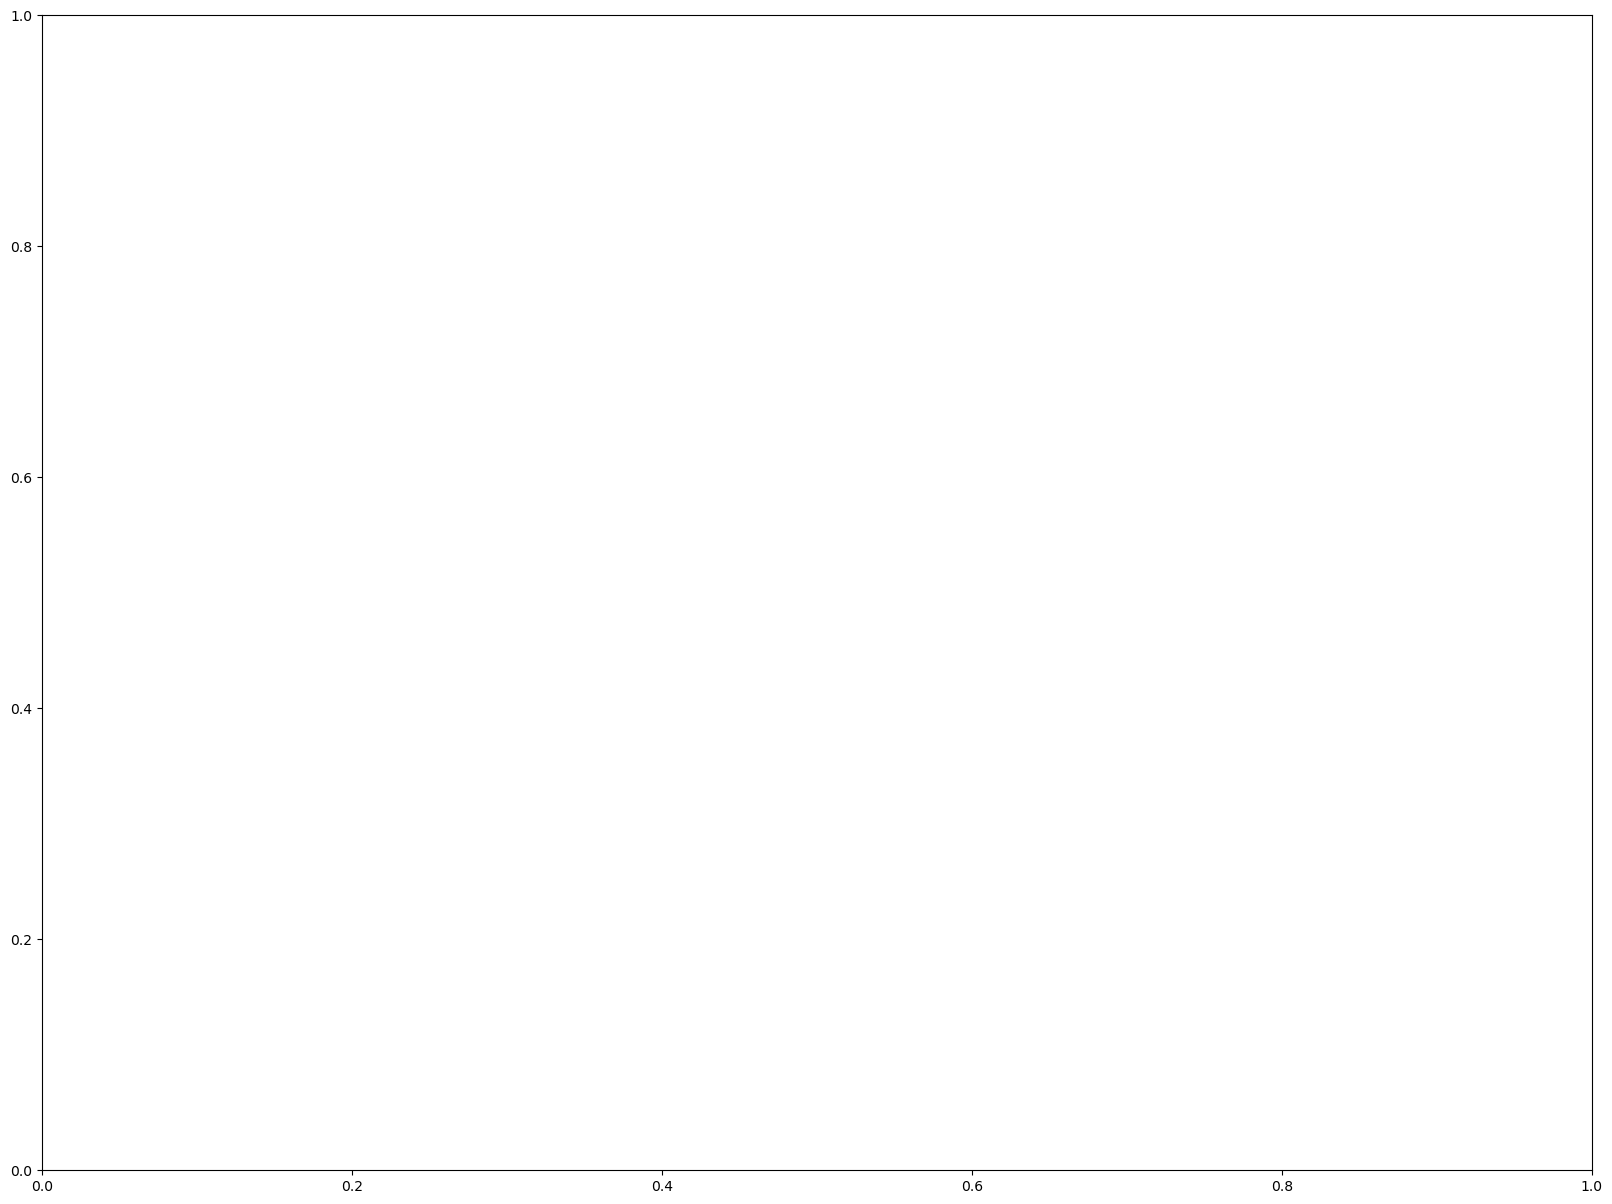

In [17]:
# plot tree in xgboost given a pictorial representation of the trees made
import xgboost as xgb
plt.figure(figsize=(20,15))
xgb.plot_tree(model, ax=plt.gca());

failed, requires graphviz

In [16]:
pip install graphviz

     ---------------------------------------- 47.0/47.0 kB ? eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
